<a href="https://colab.research.google.com/github/pepetellez/BEDU-Data-Analysis/blob/main/Procesamiento-de-Datos-con-Python/8_Bases_de_datos_merge_y_agrupaciones/s8_r6_lo_que_los_cientificos_aman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 6: Lo que los científicos aman

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - `merge`
        - Filtros con value_counts()
        - Agrupaciones y reordenamientos
    
---
    
### 2. Desarrollo:

#### a) Lo que los científicos aman

En este Reto vamos a obtener una lista de las películas que fueron mejor evaluadas por científicos para saber cuáles son sus favoritas. Vamos a realizar los siguientes pasos:

1. Lee los archivos para `movies`, `ratings` y `users`.
2. Agrega **solamente** la columna `occupation` al `DataFrame` `ratings`, para tener la información de las ocupaciones de los usuarios que realizaron los ratings.
3. Filtra tu tabla `ratings` para quedarte solamente con los ratings hechos por científicos.
4. Agrega **solamente** la columna `title` de la tabla `movies` a la tabla `ratings` para tener la información de los nombres de las películas que fueron evaluadas por científicos.
5. Filtra tu `DataFrame` para quedarte **solamente** con las películas que fueron evaluadas más de 50 veces.
6. Realiza una agrupación por película y computa el promedio de los ratings de cada película.
7. Ordena la `Serie` resultante descendentemente y asígnala  a la variable `mean_of_scientists_ratings_sorted`.

> **Nota**: el paso #5 es un poco complejo. No te desesperes si no encuentras una solución rápidamente. ¡Pídele a la experta que te guíe para que puedas resolverlo sin que te explote la cabeza!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

#Lee los archivos para movies, ratings y users.
movies = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Datasets/MovieLens/movies-separated_by_money-raw.csv', sep="$", index_col=0)
ratings = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Datasets/MovieLens/ratings-raw.csv', index_col=0)
users = pd.read_csv(r'/content/drive/MyDrive/users_full.csv')

#Agrega solamente la columna occupation al DataFrame ratings, para tener la información de las ocupaciones de los usuarios que realizaron los ratings.
ratings_with_occupation = pd.merge(ratings, users['occupation'], left_on='user_id', right_index=True)

#Filtra tu tabla ratings para quedarte solamente con los ratings hechos por científicos.
only_scientists = ratings_with_occupation[ratings_with_occupation['occupation'] == 'scientist']

#Agrega solamente la columna title de la tabla movies a la tabla ratings para tener la información de los
#nombres de las películas que fueron evaluadas por científicos.
only_scientist_with_movie_title = pd.merge(only_scientists, movies['title'], left_on='movie_id', right_index=True)

#Filtra tu DataFrame para quedarte solamente con las películas que fueron evaluadas más de 50 veces.
movies_that_appear_more_than_50_times_filter = only_scientist_with_movie_title['title'].value_counts() > 50
titles_of_movies_that_appear_more_than_50_times = only_scientist_with_movie_title['title'].value_counts()[movies_that_appear_more_than_50_times_filter].index
def title_is_in_list(list_of_titles, title):
    return title in list_of_titles
ratings_for_most_rated_movies = only_scientist_with_movie_title[only_scientist_with_movie_title['title'].apply(lambda x: title_is_in_list(titles_of_movies_that_appear_more_than_50_times, x))]

#Realiza una agrupación por película y computa el promedio de los ratings de cada película.
mean_of_scientist_ratings = ratings_for_most_rated_movies.groupby('title')['rating'].mean()

#Ordena la Serie resultante descendentemente y asígnala a la variable mean_of_scientists_ratings_sorted.
mean_of_scientists_ratings_sorted = mean_of_scientist_ratings.sort_values(ascending=False)
mean_of_scientists_ratings_sorted

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


title
Godfather, The (1972)                                    4.607843
Schindler's List (1993)                                  4.480769
Princess Bride, The (1987)                               4.321429
American Beauty (1999)                                   4.304878
Star Wars: Episode IV - A New Hope (1977)                4.295775
Fargo (1996)                                             4.250000
Saving Private Ryan (1998)                               4.250000
Silence of the Lambs, The (1991)                         4.245614
Raiders of the Lost Ark (1981)                           4.234375
Matrix, The (1999)                                       4.181818
Star Wars: Episode V - The Empire Strikes Back (1980)    4.174603
Shakespeare in Love (1998)                               4.156863
Terminator 2: Judgment Day (1991)                        4.049180
Braveheart (1995)                                        4.037037
Star Wars: Episode VI - Return of the Jedi (1983)        3.983333
Back

Pídele a tu experta la función de verificación `visualizar_lista` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


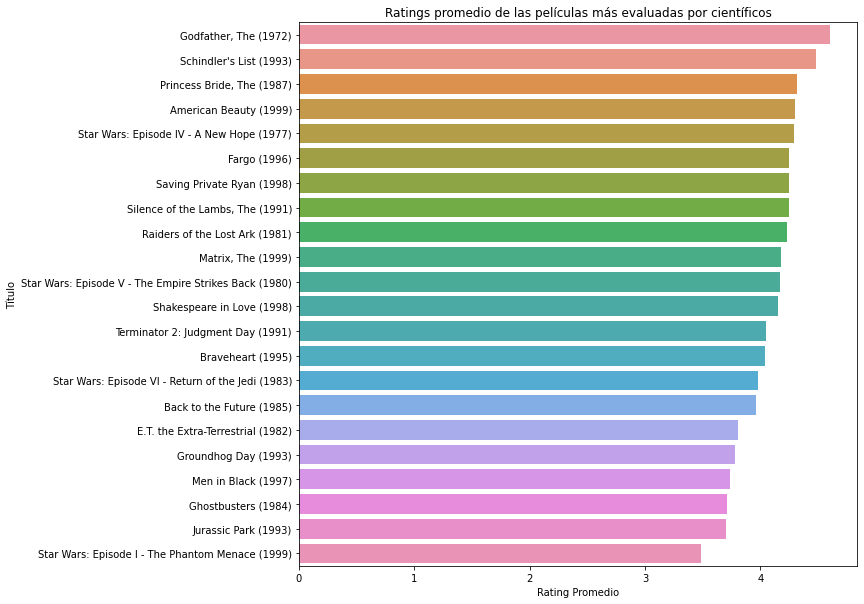

In [4]:
# Pega aquí la función de verificación 
  
def visualizar_lista(mean_of_scientists_ratings_sorted):
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Ratings promedio de las películas más evaluadas por científicos')
    sns.barplot(mean_of_scientists_ratings_sorted, mean_of_scientists_ratings_sorted.index, ax=ax)
    ax.set(ylabel='Título', xlabel='Rating Promedio')

visualizar_lista(mean_of_scientists_ratings_sorted)

<details><summary>Solución</summary>

```python
movies = pd.read_csv('../../Datasets/MovieLens/movies-separated_by_money-raw.csv', sep='$', index_col=0)
ratings = pd.read_csv('../../Datasets/MovieLens/ratings-raw.csv')
users = pd.read_csv('../../Datasets/MovieLens/users-full.csv')
ratings_with_occupation = pd.merge(ratings, users['occupation'], left_on='user_id', right_index=True)
only_scientists = ratings_with_occupation[ratings_with_occupation['occupation'] == 'scientist']
only_scientist_with_movie_title = pd.merge(only_scientists, movies['title'], left_on='movie_id', right_index=True)
movies_that_appear_more_than_50_times_filter = only_scientist_with_movie_title['title'].value_counts() > 50
titles_of_movies_that_appear_more_than_50_times = only_scientist_with_movie_title['title'].value_counts()[movies_that_appear_more_than_50_times_filter].index
def title_is_in_list(list_of_titles, title):
    return title in list_of_titles
ratings_for_most_rated_movies = only_scientist_with_movie_title[only_scientist_with_movie_title['title'].apply(lambda x: title_is_in_list(titles_of_movies_that_appear_more_than_50_times, x))]
mean_of_scientist_ratings = ratings_for_most_rated_movies.groupby('title')['rating'].mean()
mean_of_scientists_ratings_sorted = mean_of_scientist_ratings.sort_values(ascending=False)
```
    
</details>